# Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020? (Sort and use .head)
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years? (Top 3)
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which entity has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [3]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

# Question 1)
>1) Which entities (top 5) had the largest population density in 2020? (Sort and use .head)

In [4]:
facts['PopDensity2020'] = facts['Pop_2020']/facts['Area_land'] 
q1 = facts.sort_values(by='PopDensity2020',ascending=False)
q1.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,PopDensity2020
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861
32,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,282090,Jersey City,265549.0,Paterson,145627.0,Elizabeth,128885.0,Edison,100008.0,487.688035
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,179335,Cranston,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,409.775579
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,320967,Bayamón,170480.0,Carolina,147661.0,Ponce,133191.0,Caguas,124434.0,370.531574
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,699927,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239


# Question 2)
>2) Which entities have more water area than land area?

In [5]:
facts[facts['Area_land']<facts['Area_water']].sort_values(by='Area_water',ascending=False)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,PopDensity2020
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm3,13003.0,Northside3,10049.0,East End3,5128.0,Southcentral3,3277.0,305.272989
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129


# Question 3)
>3) Which entities increased in population the most in the last 10 years? (Top 3)

In [6]:
facts['pop_change'] = facts['Pop_2020']-facts['Pop_2010']

In [7]:
facts.sort_values(by='pop_change',ascending=False)[['State','Pop_2020','Pop_2010','pop_change']].head()

,State,Pop_2020,Pop_2010,pop_change
47,Texas,29145505.0,25145561,3999944.0
10,Florida,21538187.0,18801310,2736877.0
5,California,39538223.0,37253956,2284267.0
11,Georgia,10711908.0,9687653,1024255.0
52,Washington,7705281.0,6724540,980741.0


# Question 4
>4) What state bird accounts for the largest population as of 2020? Land area?


In [8]:
birds1 = facts[['Pop_2020','State_bird']].groupby(by='State_bird').sum()
birds1.sort_values(by='Pop_2020',ascending=False).head()

,Pop_2020
State_bird,
Northern mockingbird,63567335.0
Northern cardinal,56767817.0
California quail,39538223.0
Eastern bluebird,26356162.0
American robin,19576993.0


In [9]:
birds2 = facts[['Area_land','State_bird']].groupby(by='State_bird').sum()
birds2.sort_values(by='Area_land',ascending=False).head()

,Area_land
State_bird,
Willow ptarmigan,1477953
Western meadowlark,1215009
Northern mockingbird,1178574
Northern cardinal,735138
Mountain bluebird,498377


# Question 5
>5) How many entities' largest city is their capital city?


In [10]:
len(facts[facts['Capital']==facts['City_1']][['State','Capital']])

17

# Question 6
>6) Which entity has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [11]:
facts['p_drop'] = 100*(facts['city_1_pop']-facts['city_5_pop'])/facts['city_1_pop']

In [12]:
facts[['State','City_1','city_1_pop','City_5','city_5_pop','p_drop']].sort_values(by='p_drop',ascending=False).head()

,State,City_1,city_1_pop,City_5,city_5_pop,p_drop
34,New York,New York City,8879928,Syracuse,142749.0,98.392453
1,Alaska,Anchorage,291538,Sitka,8647.0,97.034006
15,Illinois,Chicago,2705994,Rockford,146526.0,94.585132
41,Pennsylvania,Philadelphia,1587828,Reading,88495.0,94.426663
19,Kentucky,Louisville,620578,Covington,40366.0,93.495419


# Question 7
>7) Of the states that joined the United States before 1790, what is the most common state flower?

In [14]:
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates.head()

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [15]:
states = pd.merge(facts,dates,left_on='USPS_code',right_on='Abbreviation',how='outer')

In [16]:
states.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_4_pop,City_5,city_5_pop,PopDensity2020,pop_change,p_drop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,189572.0,Tuscaloosa,101113.0,38.303276,244543.0,51.603902,Alabama,"December 14, 1819",State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,10529.0,Sitka,8647.0,0.496221,23160.0,97.034006,Alaska,"January 3, 1959",State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,3195.0,Pava'ia'i,2450.0,249.681818,-6082.0,69.162996,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,257165.0,Scottsdale,255310.0,24.307722,759485.0,84.622399,Arizona,"February 14, 1912",State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,81029.0,Jonesboro,76990.0,22.345490,95606.0,61.092778,Arkansas,"June 15, 1836",State,AR


In [29]:
states['Date']=pd.to_datetime(states['Date'])

In [30]:
states.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_4_pop,City_5,city_5_pop,PopDensity2020,pop_change,p_drop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,189572.0,Tuscaloosa,101113.0,38.303276,244543.0,51.603902,Alabama,1819-12-14,State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,10529.0,Sitka,8647.0,0.496221,23160.0,97.034006,Alaska,1959-01-03,State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,3195.0,Pava'ia'i,2450.0,249.681818,-6082.0,69.162996,American Samoa,1900-04-17,Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,257165.0,Scottsdale,255310.0,24.307722,759485.0,84.622399,Arizona,1912-02-14,State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,81029.0,Jonesboro,76990.0,22.345490,95606.0,61.092778,Arkansas,1836-06-15,State,AR


In [31]:
states[states['Date']<pd.datetime(1790,1,1)]['State_flower'].value_counts()

<ipython-input-31-c8ba0baebf0c>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  states[states['Date']<pd.datetime(1790,1,1)]['State_flower'].value_counts()


Mountain laurel      2
Rose                 1
American dogwood     1
Mayflower            1
Cherokee rose        1
Peach blossom        1
Black-eyed susan     1
Yellow jessamine     1
Purple lilac         1
Flowering dogwood    1
Violet               1
Name: State_flower, dtype: int64

# Question 8
>8) Which has the larger population density, the most dense US Territory or the least dense state?

In [32]:
ter = states[states['Status']=='Territory']

In [33]:
sta = states[states['Status']=='State']

In [38]:
ter['PopDensity2020'] = ter['Pop_2020']/ter['Area_land'] 
ter = ter.sort_values(by='PopDensity2020',ascending=False)
ter[['State','PopDensity2020']].head(1)

,State,PopDensity2020
42,Puerto Rico,370.531574


In [39]:
sta['PopDensity2020'] = sta['Pop_2020']/sta['Area_land'] 
sta = sta.sort_values(by='PopDensity2020',ascending=True)
sta[['State','PopDensity2020']].head(1)

,State,PopDensity2020
1,Alaska,0.496221


# Question 9
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black

In [40]:
statesbydate = states.sort_values(by='Date')

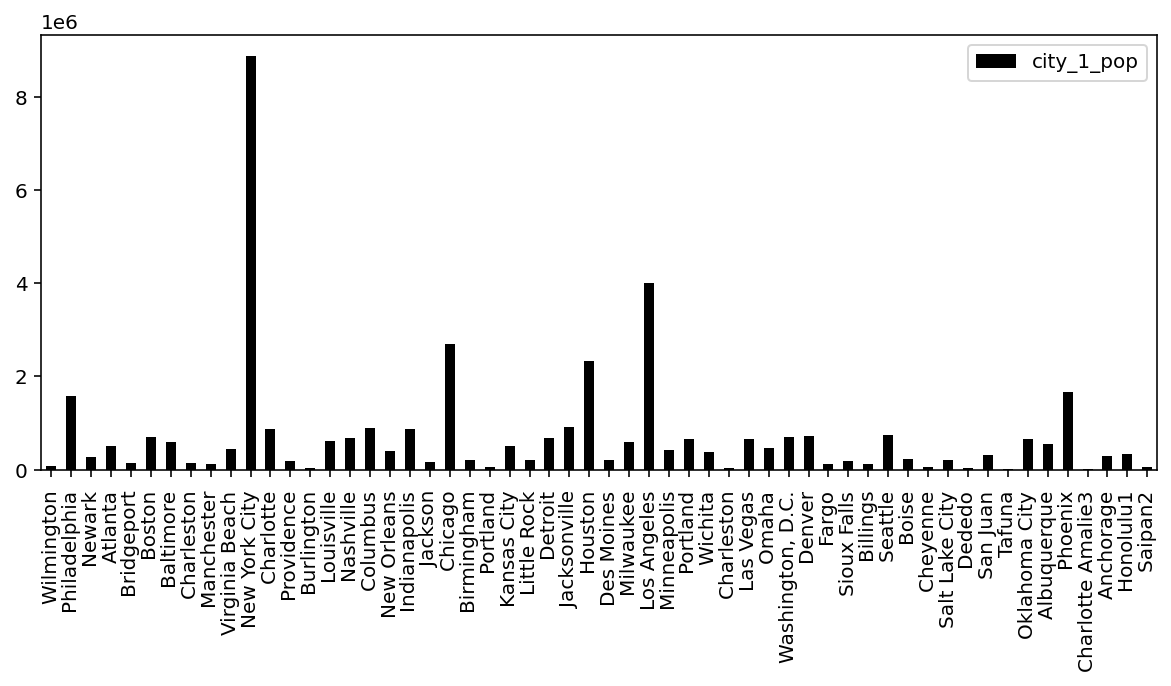

In [43]:
# Sample code to help with the plots

import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer


plot = statesbydate[['city_1_pop','City_1']].plot(kind='bar',figsize=(10,4),color='black')
plot.set_xticklabels(statesbydate['City_1']);

# Question 10
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

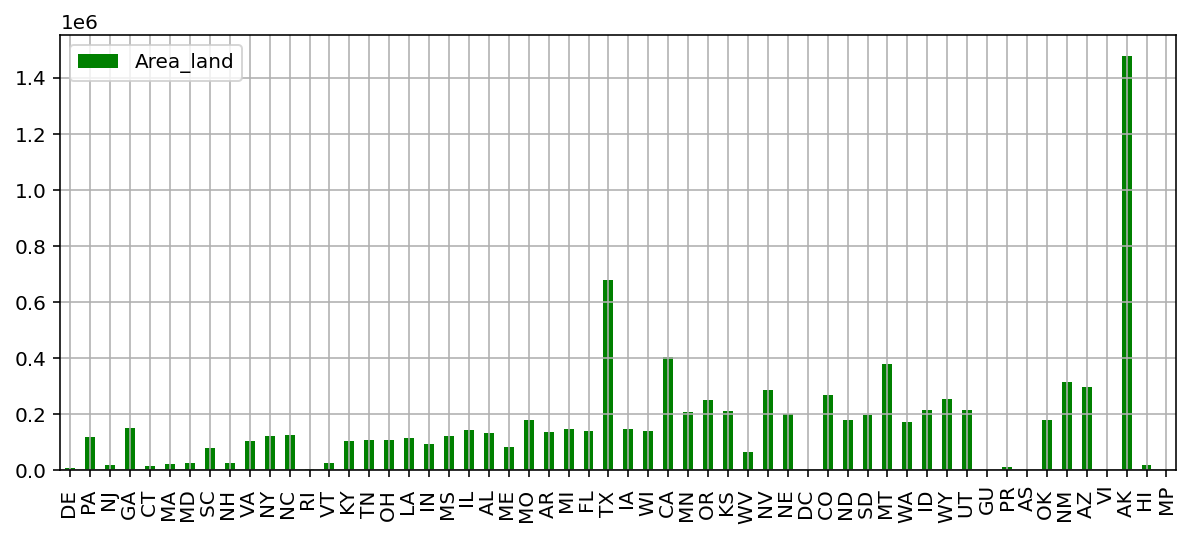

In [47]:
plot = statesbydate[['Area_land','Abbreviation']].plot(kind='bar',figsize=(10,4),color='green',grid=True)
plot.set_xticklabels(statesbydate['Abbreviation']);

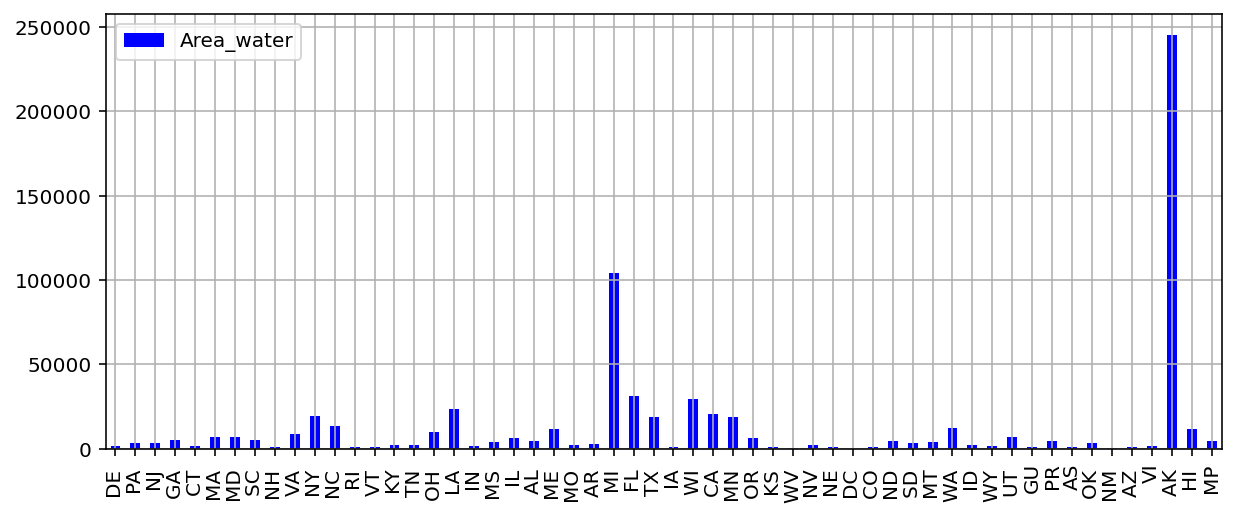

In [48]:
plot = statesbydate[['Area_water','Abbreviation']].plot(kind='bar',figsize=(10,4),color='blue',grid=True)
plot.set_xticklabels(statesbydate['Abbreviation']);

# Extra stuff for fun

In [53]:
states_territories = statesbydate[statesbydate['Status']!='Federal District']

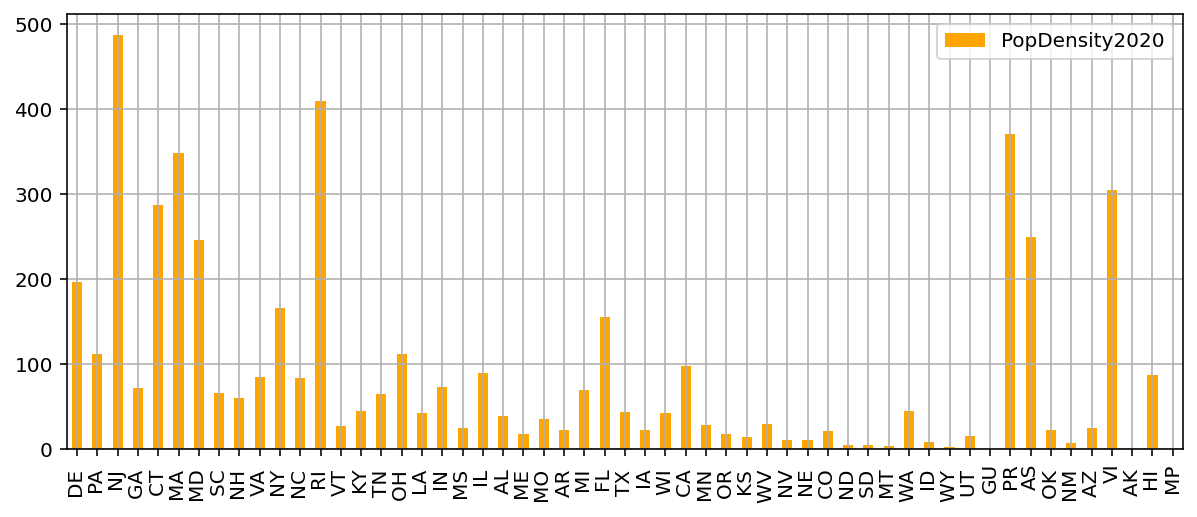

In [54]:
plot = states_territories[['PopDensity2020','Abbreviation']].plot(kind='bar',figsize=(10,4),color='orange',grid=True)
plot.set_xticklabels(states_territories['Abbreviation']);